# Decision Trees and Ensemble Learning

In [393]:
!wget https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv -O CreditScoring.csv

--2023-10-13 14:29:49--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.06s   

2023-10-13 14:29:50 (2.74 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [395]:
data = 'CreditScoring.csv'
!head $data

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [396]:
df = pd.read_csv(data)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## Data cleaning and validation

In [397]:
df.columns = df.columns.str.lower()

In [398]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [399]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [400]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [401]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [402]:
#df.income.replace(to_replace=99999999, value=None).max()

In [403]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [404]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [405]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [406]:
df = df[df.status!='unk'].reset_index(drop=True)

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=11)

In [409]:
df_full_train.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [410]:
y_train = (df_train.status=='default')*1
y_val = (df_val.status=='default')*1
y_test = (df_test.status=='default')*1

In [19]:
y_train.head()

0    1
1    1
2    0
3    1
4    0
Name: status, dtype: int64

In [20]:
df_train.drop('status', axis=1, inplace=True)
df_val.drop('status', axis=1, inplace=True)
df_test.drop('status', axis=1, inplace=True)

In [21]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


## Decision Trees

In [22]:
def assess_risk(client):
    if client['records'] == 'yes':
        return 'ok' if (client['job'] == 'partime') else 'default'
    else:
        return 'ok' if (client['assets'] > 6000) else 'default'

In [23]:
client = df_train.iloc[0].to_dict()
print(client)
assess_risk(client)

{'seniority': 10, 'home': 'owner', 'time': 36, 'age': 36, 'marital': 'married', 'records': 'no', 'job': 'freelance', 'expenses': 75, 'income': 0.0, 'assets': 10000.0, 'debt': 0.0, 'amount': 1000, 'price': 1400}


'ok'

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.fillna(0).to_dict(orient='records'))

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
X_val = dv.transform(df_val.fillna(0).to_dict(orient='records'))

In [28]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6575373568089897

In [29]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [30]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [31]:
y_pred = dt.predict_proba(X_val)[:, 1]
print('Val', roc_auc_score(y_val, y_pred))

y_pred = dt.predict_proba(X_train)[:, 1]
print('Train', roc_auc_score(y_train, y_pred))

Val 0.6058644740984719
Train 0.6282660131823559


In [32]:
from sklearn.tree import export_text

print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- class: 1
|--- feature_25 >  0.50
|   |--- class: 0



## Decision Tree algorithm

In [33]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [34]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [35]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [36]:
from IPython.display import display

for T in Ts:
    df_left = df_example[df_example.assets<=T]
    df_right = df_example[df_example.assets>T]
    print(f'{T=}')
    display(df_left)
    display(df_left.status.value_counts(normalize=True))
    display(df_right)
    display(df_right.status.value_counts(normalize=True))

T=0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64

,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

T=2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

T=3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

T=4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

T=5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

T=8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64

In [37]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default']
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [38]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [39]:
Ts = [500, 1000, 2000]

from IPython.display import display

for T in Ts:
    df_left = df_example[df_example.debt<=T]
    df_right = df_example[df_example.debt>T]
    print(f'{T=}')
    display(df_left)
    display(df_left.status.value_counts(normalize=True))
    display(df_right)
    display(df_right.status.value_counts(normalize=True))

T=500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

T=1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

T=2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

## Decision Trees parameter tuning

### Max_depth

In [40]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f'{d} -> auc: {auc:.3f}')

1 -> auc: 0.606
2 -> auc: 0.669
3 -> auc: 0.739
4 -> auc: 0.761
5 -> auc: 0.767
6 -> auc: 0.754
10 -> auc: 0.695
15 -> auc: 0.655
20 -> auc: 0.654
None -> auc: 0.661


### Max_depth and MinSamplesLeaf

In [41]:
scores = []
for d in [4, 5, 6, 7, 8, 10, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,s,auc))
        #print(f'( {d=},  {s=:3} )  ->  auc: {auc:.3f}')

In [42]:
scores_df = pd.DataFrame(scores, columns=('max_depth', 'min_samples_leaf', 'auc'))
scores_df.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
49,10.0,15,0.789648
58,NaN,15,0.785537
22,6.0,15,0.785250
50,10.0,20,0.785105
32,7.0,20,0.780551


In [43]:
scores_df_pivot = scores_df.pivot(index='min_samples_leaf', columns='max_depth', values=['auc'])
scores_df_pivot.round(3)

auc                                          
max_depth           NaN   4.0    5.0    6.0    7.0    8.0    10.0
min_samples_leaf                                                 
1                 0.647  0.761  0.766  0.758  0.749  0.725  0.694
2                 0.688  0.761  0.767  0.767  0.754  0.733  0.705
5                 0.711  0.761  0.768  0.760  0.758  0.748  0.732
10                0.757  0.761  0.762  0.778  0.763  0.763  0.762
15                0.786  0.764  0.772  0.785  0.780  0.779  0.790
20                0.781  0.761  0.774  0.773  0.781  0.778  0.785
100               0.779  0.756  0.763  0.776  0.780  0.780  0.780
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

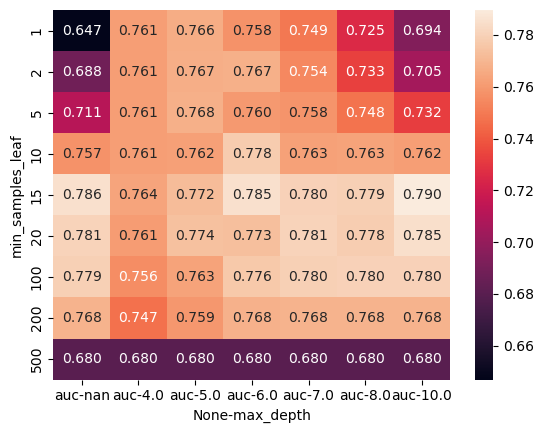

In [44]:
sns.heatmap(scores_df_pivot, annot=True, fmt='.3f')

In [45]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Ensemble Learning and Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

print(roc_auc_score(y_val, y_pred))

0.7744726453706618


In [48]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [49]:
scores = []
for n in range(10, 200, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [50]:
df_scores = pd.DataFrame(scores, columns=('n_estimator', 'auc'))
df_scores.head()

,n_estimator,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082


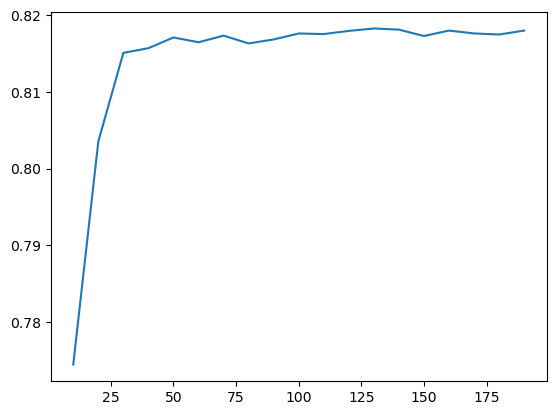

In [51]:
plt.plot(df_scores.n_estimator, df_scores.auc)

n_estimator and max_depth

In [52]:
scores = []

for n in range(10, 201, 10):
    for d in [5, 10, 15]:
        rf = RandomForestClassifier(n_estimators = n, max_depth = d,  random_state = 1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, d, auc))

In [53]:
df_scores = pd.DataFrame(scores, columns=('n_estimator', 'max_depth', 'auc'))
df_scores.head()

,n_estimator,max_depth,auc
0,10,5,0.787699
1,10,10,0.791365
2,10,15,0.794704
3,20,5,0.797731
4,20,10,0.808496


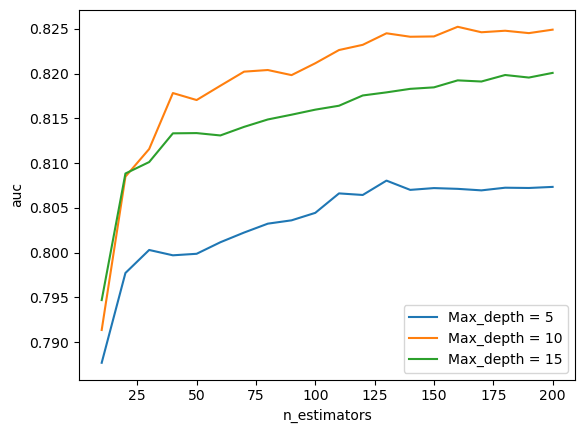

In [54]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimator, df_subset.auc, label=f'Max_depth = {d}')

plt.xlabel('n_estimators')
plt.ylabel('auc')
plt.legend()

In [55]:
max_depth = 10

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators = n, 
                                    max_depth = max_depth, 
                                    random_state = 1, 
                                    min_samples_leaf=s)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, s, auc))

In [56]:
df_scores = pd.DataFrame(scores, columns=('n_estimator', 'min_samples_leaf', 'auc'))
df_scores.head()

,n_estimator,min_samples_leaf,auc
0,10,1,0.791365
1,20,1,0.808496
2,30,1,0.811584
3,40,1,0.817839
4,50,1,0.817058


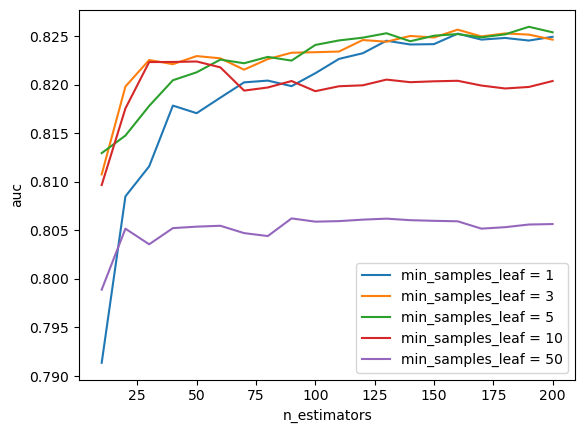

In [57]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimator, df_subset.auc, label=f'min_samples_leaf = {s}')

plt.xlabel('n_estimators')
plt.ylabel('auc')
plt.legend()

In [58]:
min_samples_leaf = 3

rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=max_depth, 
                            min_samples_leaf=min_samples_leaf, 
                            random_state=1,
                            n_jobs=-1
                            )

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)

## Gradient Boosting and XGBoost

In [59]:
!pip install xgboost

In [60]:
import xgboost as xgb

In [61]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [122]:
%%capture output

params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'dtrain'), (dval, 'dval')]
evals_result = {}
model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5, evals_result=evals_result)

In [133]:
print(output.stdout)

[0]	dtrain-auc:0.86730	dval-auc:0.77938
[5]	dtrain-auc:0.93086	dval-auc:0.80858
[10]	dtrain-auc:0.95447	dval-auc:0.80851
[15]	dtrain-auc:0.96554	dval-auc:0.81334
[20]	dtrain-auc:0.97464	dval-auc:0.81729
[25]	dtrain-auc:0.97953	dval-auc:0.81686
[30]	dtrain-auc:0.98579	dval-auc:0.81543
[35]	dtrain-auc:0.99011	dval-auc:0.81206
[40]	dtrain-auc:0.99421	dval-auc:0.80922
[45]	dtrain-auc:0.99548	dval-auc:0.80842
[50]	dtrain-auc:0.99653	dval-auc:0.80918
[55]	dtrain-auc:0.99765	dval-auc:0.81114
[60]	dtrain-auc:0.99817	dval-auc:0.81172
[65]	dtrain-auc:0.99887	dval-auc:0.80798
[70]	dtrain-auc:0.99934	dval-auc:0.80870
[75]	dtrain-auc:0.99965	dval-auc:0.80555
[80]	dtrain-auc:0.99979	dval-auc:0.80549
[85]	dtrain-auc:0.99988	dval-auc:0.80374
[90]	dtrain-auc:0.99993	dval-auc:0.80409
[95]	dtrain-auc:0.99996	dval-auc:0.80548
[100]	dtrain-auc:0.99998	dval-auc:0.80509
[105]	dtrain-auc:0.99999	dval-auc:0.80629
[110]	dtrain-auc:1.00000	dval-auc:0.80637
[115]	dtrain-auc:1.00000	dval-auc:0.80494
[120]	dtrain-a

In [184]:
lines = output.stdout.split('\n')

history_data = pd.Series(np.array(lines)).str.split('\t')[:-1]

history = pd.DataFrame.from_records(
    history_data, 
    columns=('n_iters', 'dtrain_auc', 'dval_auc')
)

history.n_iters = history.n_iters.str.strip('[]').astype(int)

transform_auc = lambda col: history[col].str.split(':').str[1].astype(float)

history.dtrain_auc = transform_auc('dtrain_auc')
history.dval_auc = transform_auc('dval_auc')

history.head()

,n_iters,dtrain_auc,dval_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729


In [178]:
pd.DataFrame(
    zip(
        evals_result['dtrain']['auc'], 
        evals_result['dval']['auc']), 
    columns=('dtrain_auc', 'dval_auc')).head(3)

,dtrain_auc,dval_auc
0,0.867303,0.779377
1,0.891402,0.789639
2,0.906994,0.790097


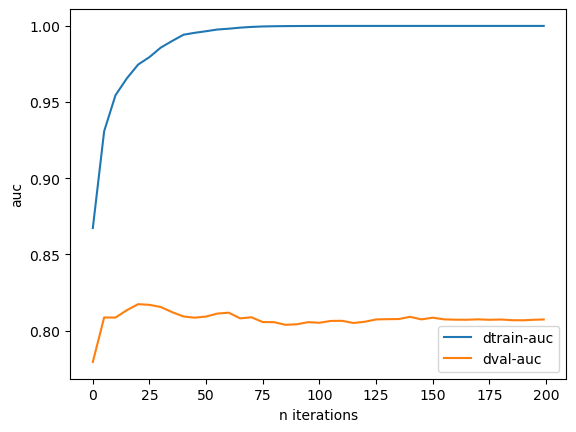

In [186]:
plt.plot(history.n_iters, history.dtrain_auc, label='dtrain-auc')
plt.plot(history.n_iters, history.dval_auc, label='dval-auc')
plt.xlabel('n iterations')
plt.ylabel('auc')
plt.legend()

In [77]:
y_pred = model.predict(dval)

In [78]:
roc_auc_score(y_val, y_pred)

0.8072491584122448

## XGBoost parameter tuning

In [267]:
def get_history(output):
    lines = output.stdout.split('\n')

    history_data = pd.Series(np.array(lines)).str.split('\t')[:-1]

    history = pd.DataFrame.from_records(
        history_data, 
        columns=('n_iters', 'dtrain_auc', 'dval_auc')
    )

    history.n_iters = history.n_iters.str.strip('[]').astype(int)

    transform_auc = lambda col: history[col].str.split(':').str[1].astype(float)

    history.dtrain_auc = transform_auc('dtrain_auc')
    history.dval_auc = transform_auc('dval_auc')
    
    return history

### eta

In [285]:
scores = {}

In [301]:
%%capture output

eta = 0.1
key = f'{eta=}'

params = {
    'eta': eta,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'dtrain'), (dval, 'dval')]
model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

In [302]:
scores[key] = get_history(output)

#### Plotting

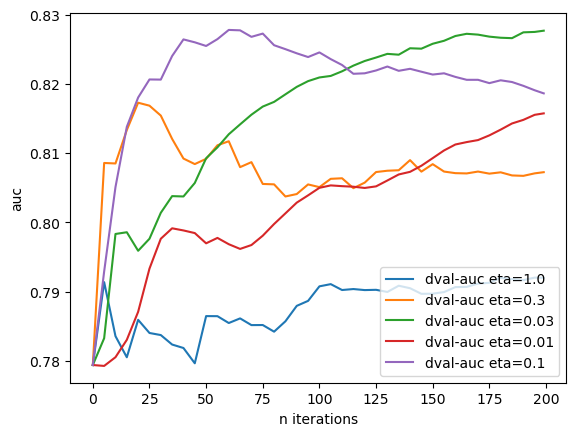

In [303]:
for eta, history in scores.items():
    plt.plot(history.n_iters, history.dval_auc, label=f'dval-auc {eta}')
plt.xlabel('n iterations')
plt.ylabel('auc')
plt.legend()

### Max_depth

In [333]:
scores = {}

In [347]:
%%capture output

max_depth = 10
key = f'{max_depth=}'

params = {
    'eta': 0.1,
    'max_depth': max_depth,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'dtrain'), (dval, 'dval')]
model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

In [348]:
scores[key] = get_history(output)

#### Plotting

In [350]:
# In the 2nd iteration:

del scores['max_depth=10']
del scores['max_depth=8']

(0.8, 0.84)

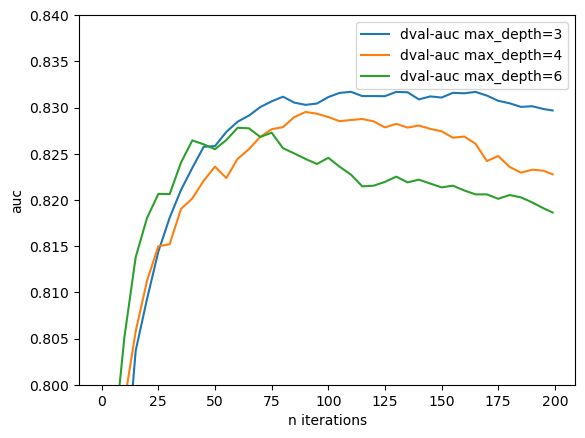

In [353]:
for max_depth, history in scores.items():
    plt.plot(history.n_iters, history.dval_auc, label=f'dval-auc {max_depth}')
plt.xlabel('n iterations')
plt.ylabel('auc')
plt.legend()

# In tthe 3rd iteration I did this:

plt.ylim((0.8, 0.84))

### min_child_weight

In [369]:
scores = {}

In [376]:
%%capture output

min_child_weight = 30
key = f'{min_child_weight=}'

params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': min_child_weight,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'dtrain'), (dval, 'dval')]
model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

In [377]:
scores[key] = get_history(output)

#### Plotting

(0.82, 0.84)

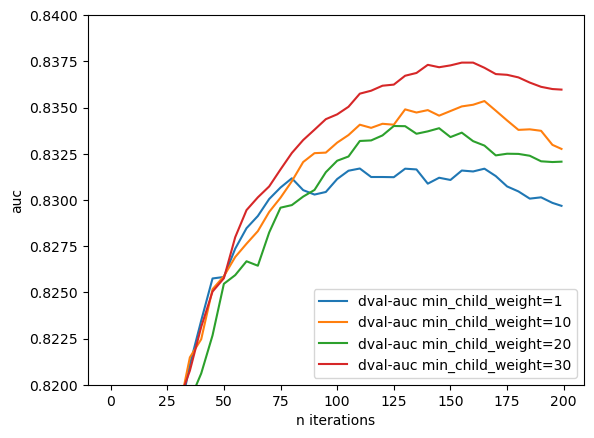

In [379]:
for min_child_weight, history in scores.items():
    plt.plot(history.n_iters, history.dval_auc, label=f'dval-auc {min_child_weight}')
plt.xlabel('n iterations')
plt.ylabel('auc')
plt.legend()

# In the 2nd iteration I did this:

#plt.ylim((0.82, 0.84))

### Model tunned

In [382]:

min_child_weight = 30
key = f'{min_child_weight=}'

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5)

## Selecting the final model

In [386]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
auc

0.785470804775859

In [387]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
auc

0.8246258264512848

In [389]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5)

y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
auc

0.8296753529824901

Training with full training data

In [411]:
y_full_train = (df_full_train.status=='default')*1
df_full_train.drop('status', axis=1, inplace=True)

In [414]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(df_full_train.to_dict(orient='records'))

X_test = dv.transform(df_test.to_dict(orient='records'))

In [417]:
dfulltrain = xgb.DMatrix(X_full_train, y_full_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, feature_names=dv.feature_names_)

In [418]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
auc

0.8289367577342261